In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temp_global = pd.read_csv('../data/cleaned/global_temperatures_cleaned.csv')
temp_global

,Unnamed: 0,date,land_average_temperature,land_average_temperature_uncertainty
0,36,1753-01-01,2.039,3.478
1,37,1753-02-01,0.715,6.341
2,38,1753-03-01,5.424,2.929
3,39,1753-04-01,8.272,3.177
4,40,1753-05-01,12.186,3.111
...,...,...,...,...
3151,3187,2015-08-01,14.755,0.072
3152,3188,2015-09-01,12.999,0.079
3153,3189,2015-10-01,10.801,0.102
3154,3190,2015-11-01,7.433,0.119


In [3]:
temp_global['date']=pd.to_datetime(temp_global['date'])

In [4]:
temp_global['year']= temp_global['date'].dt.year
temp_global = temp_global[(temp_global['year']>=1900) & (temp_global['year']<=2012)]

In [5]:
temp_global_pivot = pd.pivot_table(temp_global, index=['year'], values='land_average_temperature', aggfunc=np.mean).reset_index()
temp_global_pivot = temp_global_pivot.T

C:\Users\schue\AppData\Local\Temp\ipykernel_35792\1385106868.py:1: FutureWarning: The provided callable <function mean at 0x00000206881B7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_global_pivot = pd.pivot_table(temp_global, index=['year'], values='land_average_temperature', aggfunc=np.mean).reset_index()


In [6]:
# Assume the first row contains the column names
column_names_row = temp_global_pivot.iloc[0]
column_names_row 
# Set the DataFrame columns using the values from the row
temp_global_pivot = temp_global_pivot.set_axis(column_names_row, axis=1)
temp_global_pivot
# Drop the row used for column names
temp_global_pivot = temp_global_pivot.drop('year',axis=0)
temp_global_pivot
# Display the resulting DataFrame
#pd.DataFrame(temp_global_pivot, columns=column_names_row)

year,1900.0,1901.0,1902.0,1903.0,1904.0,1905.0,1906.0,1907.0,1908.0,1909.0,...,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0
land_average_temperature,8.501583,8.541917,8.304417,8.220167,8.090917,8.225167,8.379083,7.947167,8.186083,8.17825,...,9.525583,9.324583,9.700917,9.5325,9.732167,9.43175,9.50525,9.703083,9.516,9.507333


In [7]:
list_of_col = temp_global_pivot.columns
for x in list_of_col:
    if (x != 'country') & (x != 1900):        
        temp_global_pivot[f"diff{x}"] = temp_global_pivot[x] - temp_global_pivot[x-1]
    else:
        pass   

C:\Users\schue\AppData\Local\Temp\ipykernel_35792\671396937.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_global_pivot[f"diff{x}"] = temp_global_pivot[x] - temp_global_pivot[x-1]
C:\Users\schue\AppData\Local\Temp\ipykernel_35792\671396937.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_global_pivot[f"diff{x}"] = temp_global_pivot[x] - temp_global_pivot[x-1]
C:\Users\schue\AppData\Local\Temp\ipykernel_35792\671396937.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [8]:
temp_global_pivot

year,1900.0,1901.0,1902.0,1903.0,1904.0,1905.0,1906.0,1907.0,1908.0,1909.0,...,diff2003.0,diff2004.0,diff2005.0,diff2006.0,diff2007.0,diff2008.0,diff2009.0,diff2010.0,diff2011.0,diff2012.0
land_average_temperature,8.501583,8.541917,8.304417,8.220167,8.090917,8.225167,8.379083,7.947167,8.186083,8.17825,...,-0.044833,-0.201,0.376333,-0.168417,0.199667,-0.300417,0.0735,0.197833,-0.187083,-0.008667


In [9]:
temp_global_pivot_diff = temp_global_pivot.drop(columns=list_of_col[0:], axis=1)
temp_global_pivot_diff

year,diff1901.0,diff1902.0,diff1903.0,diff1904.0,diff1905.0,diff1906.0,diff1907.0,diff1908.0,diff1909.0,diff1910.0,...,diff2003.0,diff2004.0,diff2005.0,diff2006.0,diff2007.0,diff2008.0,diff2009.0,diff2010.0,diff2011.0,diff2012.0
land_average_temperature,0.040333,-0.2375,-0.08425,-0.12925,0.13425,0.153917,-0.431917,0.238917,-0.007833,0.04475,...,-0.044833,-0.201,0.376333,-0.168417,0.199667,-0.300417,0.0735,0.197833,-0.187083,-0.008667


In [10]:
modified_list_of_col = pd.Index([x for x in list_of_col if x != 1900])
temp_global_pivot_diff.columns = modified_list_of_col
temp_global_pivot_diff_t = temp_global_pivot_diff.T
temp_global_pivot_diff_t = temp_global_pivot_diff_t.reset_index()
temp_global_diff = temp_global_pivot_diff_t
temp_global_diff['index'] = temp_global_diff['index'].astype(int)
temp_global_diff.rename(columns={'index':'year','land_average_temperature':'annual_increase_temp'}, inplace=True)
temp_global_diff

,year,annual_increase_temp
0,1901,0.040333
1,1902,-0.237500
2,1903,-0.084250
3,1904,-0.129250
4,1905,0.134250
...,...,...
107,2008,-0.300417
108,2009,0.073500
109,2010,0.197833
110,2011,-0.187083


<Axes: xlabel='year', ylabel='annual_increase_temp'>

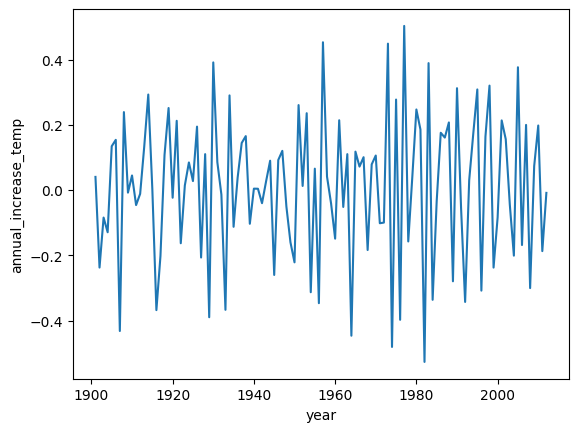

In [11]:
sns.lineplot(data=temp_global_diff, x='year', y='annual_increase_temp',)

In [12]:
temp_global_diff.to_csv('../data/cleaned/annual_increase_of_temp_global.csv', index=False)